# **K-NN 분류분석**



### **1\. K-Nearest Neighbor 알고리즘**

K-NN(K-Nearest Neighbors) 분류분석은 대표적인 분류 지도 학습 알고리즘이다.

새로운 데이터 포인트가 주어졌을 때, 기존 데이터 세트에서 그 데이터 포인트와 가장 가까운 K개의 이웃을 찾아, 이 이웃들이 가장 많이 속해 있는 레이블로 새 데이터 포인트를 분류.



#### **장점**

-   K-NN은 데이터의 분포를 가정하지 않기 때문에 (**비모수적**), 다양한 형태의 데이터 세트에 적용 가능.
-   여러 특성(Feature)을 가진 데이터에도 적용 가능.

#### **단점**

-   데이터 크기가 커질수록, 모든 데이터 point 간의 거리를 계산해야 하므로 계산 비용이 높음
-   데이터 feature 수가 많을수록, point간 거리를 구하는 연산량이 많지고 거리가 증가하여 성능 저하.
-   너무 작은 K값은 노이즈에 민감하고, 너무 큰 K값은 분류 경계 단순화.

### **2\. K-NN 분류 분석의 작동 원리**

1.  주어진 새 데이터 포인트와 기존 데이터 포인트들 사이의 거리를 측정.
2.  분류를 결정하기 위해 참조할 가장 가까운 이웃의 수(K)를 결정.
3.  계산된 거리를 바탕으로 가장 가까운 K개의 이웃을 찾는다.
4.  선정된 K개의 이웃 중 가장 많이 나타나는 분류로 새 데이터 포인트를 분류합니다.


### **3\. 실습 코드**

Accuracy: 1.00


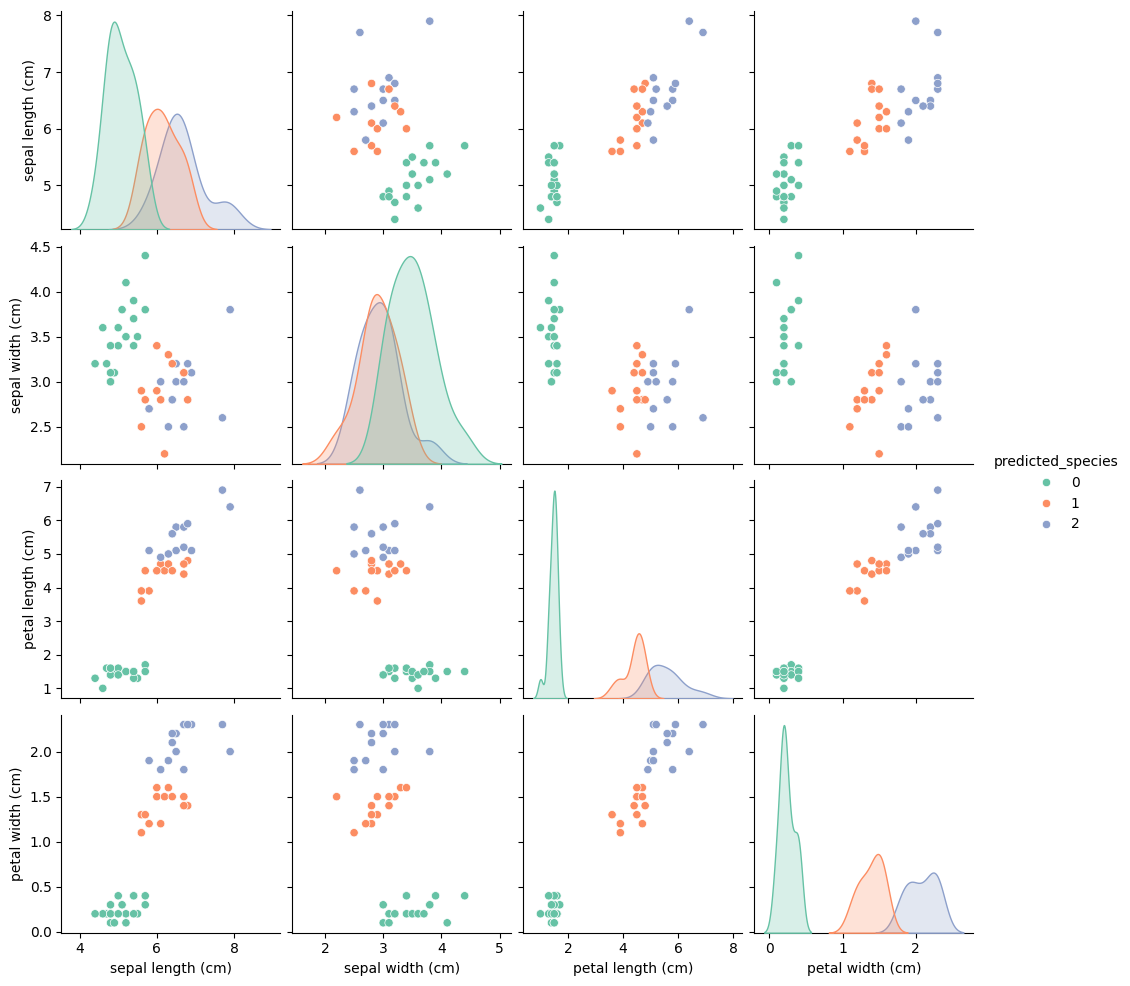

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# step 1: 데이터 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# step 2: 데이터 분할 
X_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[X_columns]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# step 3: K-NN 모델 생성 및 훈련
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)

y_pred = KNN_clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

# step 4: 시각화
X_test = X_test.copy()
X_test['predicted_species'] = y_pred

sns.pairplot(data=X_test, hue='predicted_species', palette="Set2", kind="scatter")
plt.show()